HEART DISEASE DIAGNOSTIC ANALYSIS INTRODUCTION

The Heart Disease Diagnostic Dataset is a collection of medical data from patients who have undergone various diagnostic tests to detect heart disease. The dataset contains information on several features such as age, sex, cholesterol level, blood pressure, and the presence of various symptoms.

The aim of the dataset is to predict the presence of heart disease in a patient based on their medical profile. This can be useful for early detection and treatment of heart disease, which is one of the leading causes of death globally.

The dataset consists of 14 attributes, including the target variable, and has a total of 303 instances. The target variable indicates the presence or absence of heart disease, and is represented as a binary value (0 or 1).

IMPORTING ALL THE LIBRARIES

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# reading the dataset
data = pd.read_csv("/content/heart.csv")

In [3]:
data.shape

(303, 14)

In [4]:
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
data.tail(2)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
data.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [9]:
# to check wheather there are any null values present in the data
data.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [11]:
# by this we can say that there are no null values present in the data so there in no need of imputation

In [13]:
# to get the statistical values within the data we can use describe function as below
data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [16]:
output = data.groupby('output').size()
print(output)

output
0    138
1    165
dtype: int64


In [17]:
#Converting Numerical Data into Categorical Data

def heart_disease(row):
    if row==0:
        return 'Absence'
    elif row==1:
        return 'Presence'

In [18]:
#Applying converted data into our dataset with new column - Heart_Disease inplace of output

data['Heart_Disease']=data['output'].apply(heart_disease)
data.head(2)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,Heart_Disease
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,Presence
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,Presence


In [19]:
# Now analysing the data based on individual features 

AGE

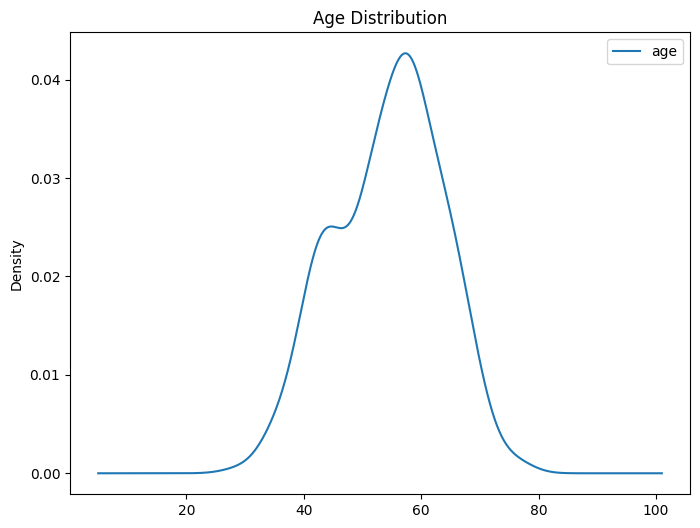

In [20]:
data.age.plot(kind='kde', figsize=(8,6), legend=True, title="Age Distribution")
plt.show()

GENDER

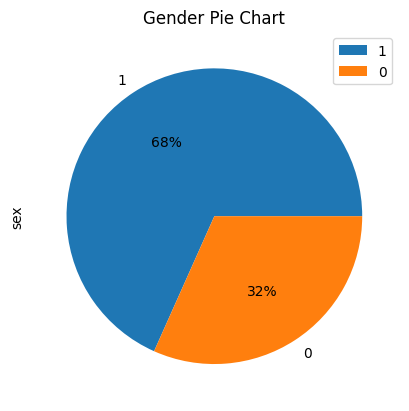

In [21]:
data.sex.value_counts().plot(kind='pie', autopct='%1.0f%%', legend=True, title="Gender Pie Chart")
plt.show()

BLOOD PRESSURE

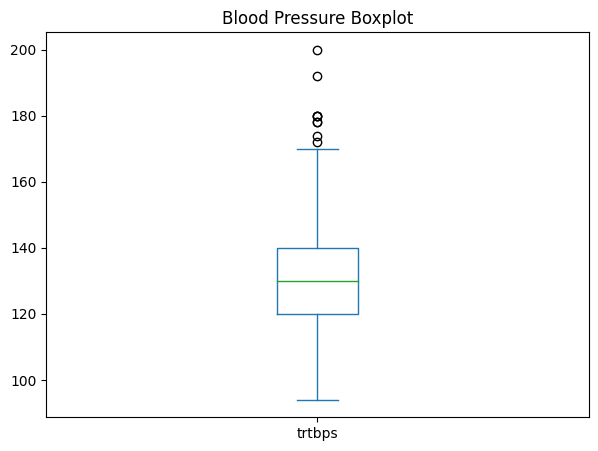

In [23]:
data.trtbps.plot(kind='box', legend=True,figsize=(7,5), title="Blood Pressure Boxplot")
plt.show()

BLOOD SUGAR

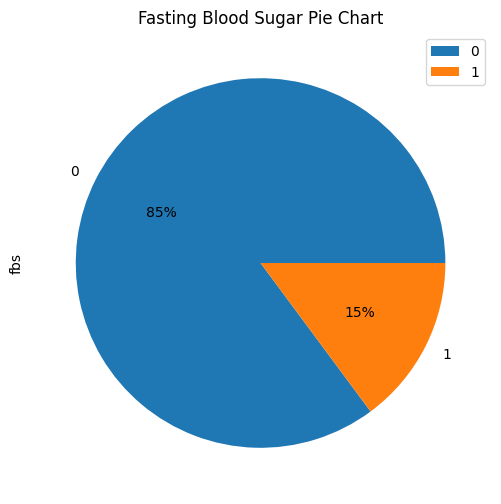

In [24]:
data.fbs.value_counts().plot(kind="pie", autopct="%1.0f%%", title="Fasting Blood Sugar Pie Chart", legend=True, figsize=(8,6))
plt.show()

MAJOR VESSELS

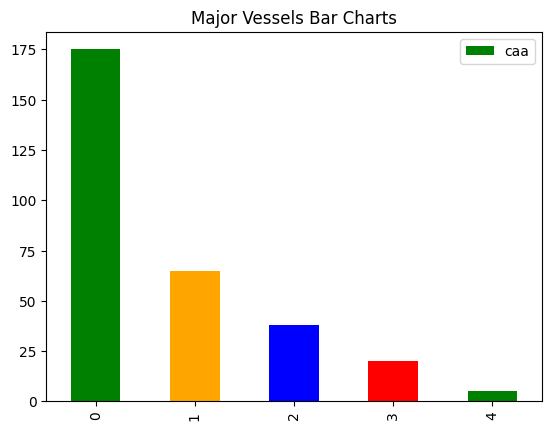

In [26]:
data.caa.value_counts().plot(kind='bar', legend=True, title="Major Vessels Bar Charts", color=["green","orange","blue","red"])
plt.show()

OUTPUT COLUMN

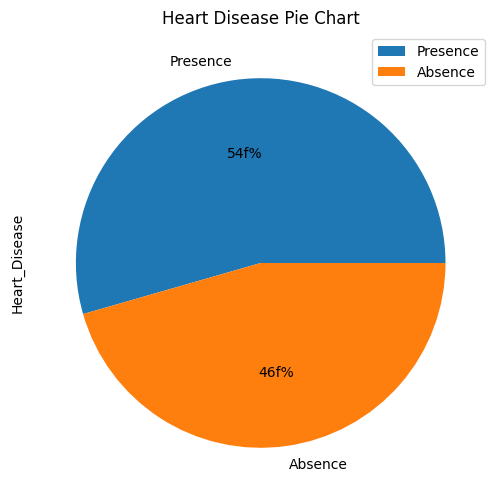

In [27]:
data.Heart_Disease.value_counts().plot(kind="pie", autopct="%1.0ff%%", legend=True, title="Heart Disease Pie Chart", figsize=(7,6))
plt.show()

In [28]:
#Statistical Analysis

Min_Age=data['age'].min()
Max_Age=data['age'].max()
Mean_Age=data['age'].mean()
print("Minimum Age :>",Min_Age)
print("Maximum Age :>",Max_Age)
print("Mean Age :>",Mean_Age)

Minimum Age :> 29
Maximum Age :> 77
Mean Age :> 54.366336633663366


In [29]:
# creating function to convert numerical to categorical data


# age column
def age_(column):
    if column <35:
        return "Youngster"
    elif column >=35 and column <60:
        return "Senior Citizens"
    else:
        return "Super Senior Citizens"

# sex column
def sex_(column):
    if column == 1:
        return "Male"
    else:
        return "Female"

# cp column
def cp_(column):
    if column == 1:
        return "Stable"
    elif column == 2:
        return "Unstable"
    elif column == 3:
        return "Microvascular"
    else:
        return "Variant"

# trtbps column
def exang_(column):
    if column ==1:
        return "Yes"
    else:
        return "No"

# slope column
def slope_(column):
    if column == 1:
        return "Upsloping"
    elif column == 2:
        return "Flat"
    else:
        return "Downsloping"

# # ca column
# def ca(column):
#     if column == 0:
#         return "Arteries"
#     elif column == 1:
#         return "Arterioles"
#     elif column == 2:
#         return ""
#     elif column == 3:
#         return ""
#     else:
#         return ""

# thall column

def thal_(column):
    if column==3:
        return "Normal"
    elif column==6:
        return "Fixed Defect"
    elif column==7:
        return "Reversable Defect"

# num column
def num_(column):
    if column==1:
        return "Presence"
    else:
        return "Absense"

In [30]:
final_data = data.copy()

In [31]:
final_data.head(3)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,Heart_Disease
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,Presence
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,Presence
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,Presence


In [38]:
final_data['ageC'] = final_data['age'].apply(age_)
final_data['sexC'] = final_data['sex'].apply(sex_)
final_data['cpC'] = final_data['cp'].apply(cp_)
final_data['exng'] = final_data['exng'].apply(exang_)
final_data['slp'] = final_data['slp'].apply(slope_)
final_data['thall'] = final_data['thall'].apply(thal_)

In [39]:
final_data.head(3)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,Heart_Disease,ageC,sexC,cpC
0,63,1,3,145,233,1,0,150,No,2.3,Downsloping,0,None,1,Presence,Super Senior Citizens,Male,Microvascular
1,37,1,2,130,250,0,1,187,No,3.5,Downsloping,0,None,1,Presence,Senior Citizens,Male,Unstable
2,41,0,1,130,204,0,0,172,No,1.4,Downsloping,0,None,1,Presence,Senior Citizens,Female,Stable


UNIVARIATE ANALYSIS

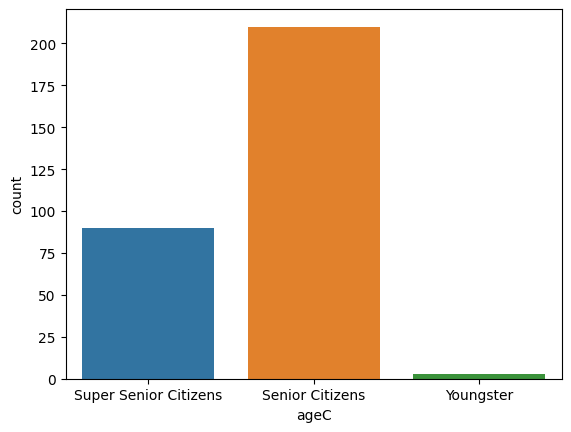

In [40]:
sns.countplot(x=final_data.ageC)
plt.show()

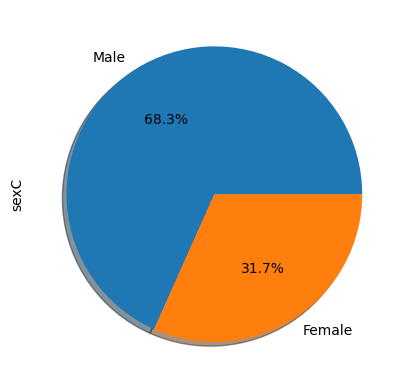

In [42]:
final_data.sexC.value_counts().plot(kind='pie', autopct='%1.1f%%', shadow=True)
plt.show()

MULTI VARIATE ANALYSIS

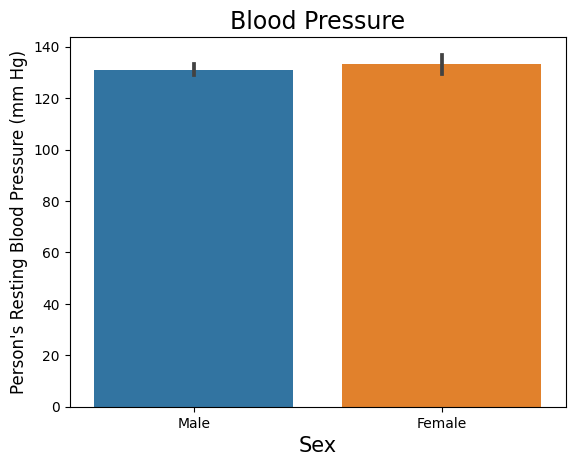

In [44]:
sns.barplot(x='sexC', y='trtbps', data=final_data)
plt.title("Blood Pressure", fontsize=17)
plt.xlabel('Sex',fontsize=15)
plt.ylabel("Person's Resting Blood Pressure (mm Hg)", fontsize=12)
plt.show()

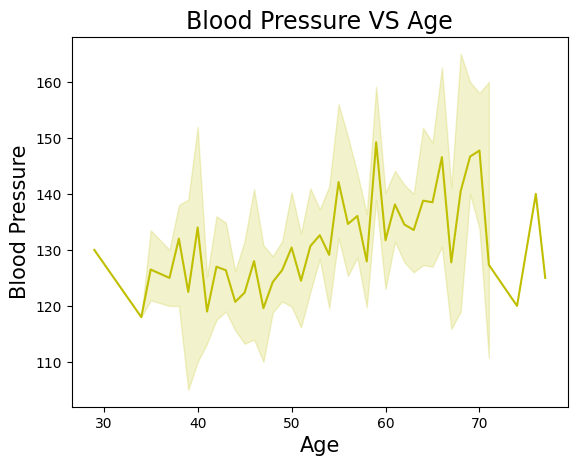

In [47]:
sns.lineplot(x='age', y='trtbps', data=final_data, color='y')
plt.title('Blood Pressure VS Age', fontsize=17)
plt.xlabel('Age', fontsize=15)
plt.ylabel('Blood Pressure', fontsize=15)
plt.show()

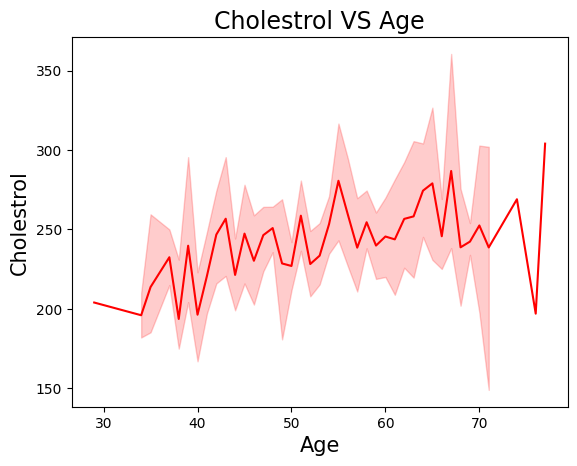

In [48]:
sns.lineplot(x='age', y='chol', data=final_data, color='r')
plt.title('Cholestrol VS Age', fontsize=17)
plt.xlabel('Age', fontsize=15)
plt.ylabel('Cholestrol', fontsize=15)
plt.show()

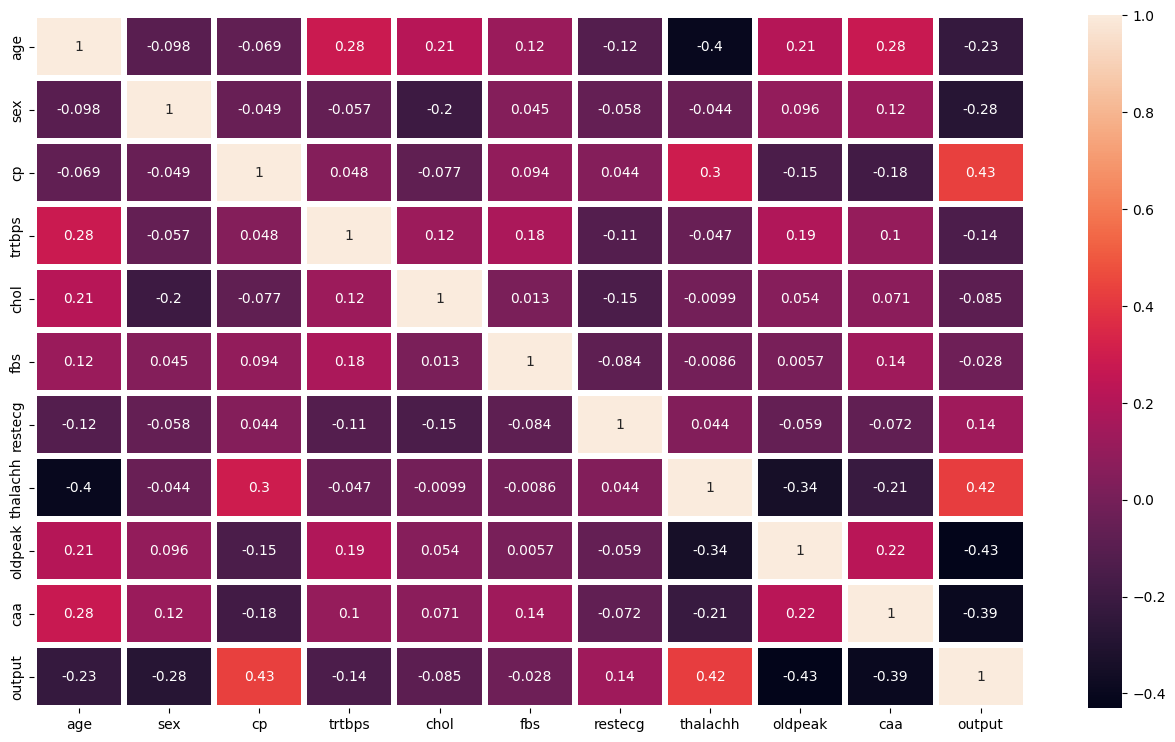

In [49]:
# correlation (shows how correlated the particular features are correlated with each other)

plt.figure(figsize=(16,9))
sns.heatmap(final_data.corr(), annot=True, linewidth=3)
plt.show()